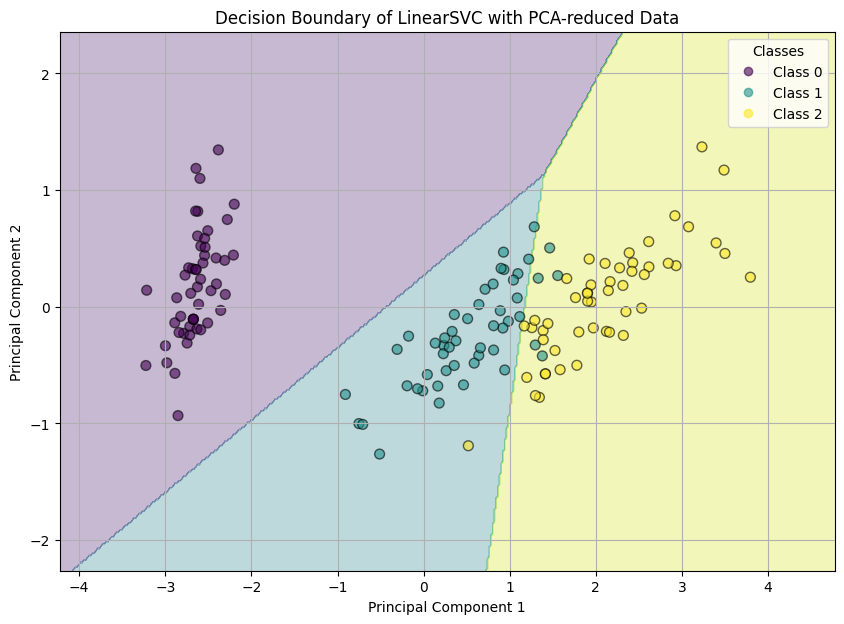

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

with open('iris.data', 'r') as f:
    data = [list(map(lambda x: float(x) if ord('0') <= ord(x[0]) <= ord('9') else x.replace('\n', ''), line.split(','))) for line in f]


# X, y = make_classification(
#     n_samples=1000,
#     n_features=5, 
#     n_informative=3,
#     n_classes=2, 
#     random_state=999 
# )
X = [st[0:4] for st in data]
y = [st[4] for st in data]
index = 0
classes = dict()
for i in range(len(y)):
    if y[i] not in classes:
        classes[y[i]] = index
        index += 1
    y[i] = classes[y[i]]


clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.title('Decision Boundary of LinearSVC with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'], title="Classes")
plt.grid(True)
plt.show()
